## Introduction

Classification is a machine learning algorithm whose output is within a set of discrete labels. This is in contrast to Regression, which involved a target variable that was on a continuous range of values.

Throughout this tutorial we'll review different classification algorithms, but you'll notice that the workflow is consistent: split the dataset into training and testing datasets, fit the model on the training set, and classify each data point in the testing set. 

## LDA vs QDA

Discriminant Analysis is a statistical technique used to classify data into groups based on each data point's features. 

### Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is a linear classification algorithm used for when it can be assumed that the covariance is the same for <b>all</b> classes. It's mostly used as a dimension reduction technique in the pre-processing portion so that the different classes are separable and therefore easier to classify and avoid overfitting. 

LDA is similar to Principal Component Analysis (PCA), but LDA also considers the axes that maximize the separation between multiple classes. It works by finding the linear combinations of the original variables that gives the best separation between the groups in the data set. 

### Quadratic Discriminant Analysis

Quadratic Discriminant Analysis, on the other hand, is used for heterogeneous variance-covariance matrices. Because QDA has more parameters to estimate, it's typically less accurate than LDA.

## Support Vector Machines

Support Vector Machines (SVMs) is a machine learning algorithm used for classification tasks. Its primary goal is to find an optimal separating hyperplane that separates the data into its classes. This optimal separating hyperplane is the result of the maximization of the margin of the training data.

### Separating Hyperplane

Let's take a look at the scatterplot of the iris dataset that could easily be used by a SVM: 

![alt text](https://github.com/lesley2958/regression/blob/master/log-scatter.png?raw=true "Logo Title Text 1")

Just by looking at it, it's fairly obvious how the two classes can be easily separated. The line which separates the two classes is called the <b>separating hyperplane</b>.

In this example, the hyperplane is just two-dimensional, but SVMs can work in any number of dimensions, which is why we refer to it as <i>hyperplane</i>.

#### Optimal Separating Hyperplane

Going off the scatter plot above, there are a number of separating hyperplanes. The job of the SVM is find the <i>optimal</i> one. 

To accomplish this, we choose the separating hyperplane that maximizes the distance from the datapoints in each category. This is so we have a hyperplane that generalizes well.

### Margins

Given a hyperplane, we can compute the distance between the hyperplane and the closest data point. With this value, we can double the value to get the <b>margin</b>. Inside the margin, there are no datapoints. 

The larger the margin, the greater the distance between the hyperplane and datapoint, which means we need to <b>maximize</b> the margin. 

![alt text](https://github.com/lesley2958/ml-classification/blob/master/margin.png?raw=true "Logo Title Text 1")

### Equation

Recall the equation of a hyperplane: w<sup>T</sup>x = 0. Here, `w` and `x` are vectors. If we combine this equation with `y = ax + b`, we get:

![alt text](https://github.com/lesley2958/ml-classification/blob/master/wt.png?raw=true "Logo Title Text 1")

This is because we can rewrite `y - ax - b = 0`. This then becomes:

w<sup>T</sup>x = -b &Chi; (1) + (-a) &Chi; x + 1 &Chi; y

This is just another way of writing: w<sup>T</sup>x = y - ax - b. We use this equation instead of the traditional `y = ax + b` because it's easier to use when we have more than 2 dimensions.  

#### Example

Let's take a look at an example scatter plot with the hyperlane graphed: 

![alt text](https://github.com/lesley2958/ml-classification/blob/master/ex1.png?raw=true "Logo Title Text 1")

Here, the hyperplane is x<sub>2</sub> = -2x<sub>1</sub>. Let's turn this into the vector equivalent:

![alt text](https://github.com/lesley2958/ml-classification/blob/master/vectex1.png?raw=true "Logo Title Text 1")

Let's calculate the distance between point A and the hyperplane. We begin this process by projecting point A onto the hyperplane.

![alt text](https://github.com/lesley2958/ml-classification/blob/master/projex1.png?raw=true "Logo Title Text 1")

Point A is a vector from the origin to A. So if we project it onto the normal vector w: 

![alt text](https://github.com/lesley2958/ml-classification/blob/master/normex1.png?raw=true "Logo Title Text 1")

This will get us the projected vector! With the points (3,4) and (2,1) [this came from w = (2,1)], we can compute `||p||`. Now, it'll take a few steps before we get there.

We begin by computing `||w||`: 

`||w||` = &#8730;(2<sup>2</sup> + 1<sup>2</sup>) = &#8730;5. If we divide the coordinates by the magnitude of `||w||`, we can get the direction of w. This makes the vector u = (2/&#8730;5, 1/&#8730;5).

Now, p is the orthogonal prhoojection of a onto w, so:

![alt text](https://github.com/lesley2958/ml-classification/blob/master/orthproj.png?raw=true "Logo Title Text 1")

#### Margin Computation

Now that we have `||p||`, the distance between A and the hyperplane, the margin is defined by:

margin = 2||p|| = 4&#8730;5. This is the margin of the hyperplane!


## Iris Classification

Let's perform the iris classification from earlier with a support vector machine model:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

Now we can create an instance of SVM and fit the data. For this to happen, we need to declare a regularization parameter, C. 

In [2]:
C = 1.0 
svc = svm.SVC(kernel='linear', C=1, gamma=1).fit(X, y)

Based off of this classifier, we can create a mesh graph:

In [3]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)

Now we pull the prediction method on our data:

In [4]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Lastly, we visualize this with matplotlib:

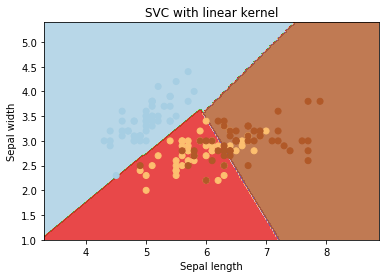

In [5]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

### Kernels

Classes aren't always easily separable. In these cases, we build a decision function that's polynomial instead of linear. This is done using the <b>kernel trick</b>.

![alt text](https://github.com/lesley2958/regression/blob/master/svm.png?raw=true "Logo Title Text 1")

If you modify the previous code with the kernel parameter, you'll get different results!

In [6]:
svc = svm.SVC(kernel='rbf', C=1, gamma=1).fit(X, y)

Usually, linear kernels are the best choice if you have large number of features (>1000) because it is more likely that the data is linearly separable in high dimensional space. Also, you can RBF but do not forget to cross validate for its parameters as to avoid overfitting.

### Tuning

Tuning parameters value for machine learning algorithms effectively improves the model performance. Let’s look at the list of parameters available with SVM.

#### Gamma 

Notice our gamma value from earlier at 1. The higher the value of gamma the more our model will try to exact fit the as per training data set, leading to an overfit model.

Let's see our visualizations with gamma values of 10 and 100: 

In [7]:
svc = svm.SVC(kernel='linear', C=1, gamma=10).fit(X, y)
svc = svm.SVC(kernel='linear', C=1, gamma=100).fit(X, y)

### Evaluation

As with any other machine learning model, there are pros and cons. In this section, we'll review the pros and cons of this particular model.

#### Pros

SVMs largest stength is its effectiveness in high dimensional spaces, even when the number of dimensions is greater than the number of samples. Lastly, it uses a subset of training points in the decision function (called support vectors), so it's also memory efficient.

#### Cons

Now, if we have a large dataset, the required time becomes high. SVMs also perform poorly when there's noise in the dataset. Lastly, SVM doesn’t directly provide probability estimates and must be calculated using an expensive five-fold cross-validation.

## Linear SVM

SVM's implementation is based on the Sequential Minimal Optimization (SMO), which works as followS: 

1. recursively select a pair of elements ($\alpha_1, \alpha_2$).
2. perform 1D optimization of the objective function on this pair.

### Challenge

Implement a function `linear_kernel()` that computes the kernel matrix K = $\Phi \Phi^T$

Get a solution for the dual problem with [alphas, beta0] = SMO(K, ... y, C), where C = 0.1.

### Kernel Matrix

$K_{i,j} = \langle \Phi_i, \Phi_j \rangle$, the kernel matrix is obtained with the formula K = $\Phi \Phi^T$. Instead, however, you can use a different function to replace the scalar product, such as the Radial Basis Function (RBF). 

$ RBF(\Phi_i, \Phi_j) = exp(-\gamma||\Phi_i - \Phi_j||^2)$

#### Challenge 

Implement a function `rbf_kernel` and compute K with it. Set $\gamma = 1$ and C = 1. 

How do $\gamma$ and C influence results?

How can you automatically find the parameters $\gamma$ and C? Implement it.